In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


In [2]:
!unzip -q -o '/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip'
!unzip -q -o '/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip'

In [3]:
import glob
glob.glob('train/*')[:5]

['train/cat.3070.jpg',
 'train/cat.12060.jpg',
 'train/dog.7156.jpg',
 'train/dog.34.jpg',
 'train/cat.2791.jpg']

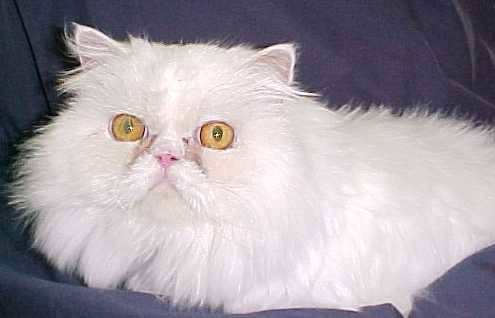

In [4]:
from PIL import Image
Image.open('train/cat.6643.jpg')

In [5]:
train = pd.DataFrame(glob.glob('train/*'),columns=['path'])
train['label'] = train['path'].apply(lambda x : x.split('/')[-1].split('.')[0])
train

,path,label
0,train/cat.3070.jpg,cat
1,train/cat.12060.jpg,cat
2,train/dog.7156.jpg,dog
3,train/dog.34.jpg,dog
4,train/cat.2791.jpg,cat
...,...,...
24995,train/cat.11965.jpg,cat
24996,train/dog.8590.jpg,dog
24997,train/cat.8046.jpg,cat
24998,train/dog.4190.jpg,dog


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator()
train_generator = idg.flow_from_dataframe(train,x_col='path',y_col='label')

Found 25000 validated image filenames belonging to 2 classes.


In [7]:
from tensorflow.keras import *
from tensorflow.keras.layers import *

In [8]:
from tensorflow.keras.applications.resnet import ResNet50

In [9]:
# model = Sequential()
# model.add(Conv2D(32,3,activation='relu',input_shape=(256,256,3)))# 커널 수, 커널사이즈,activation, inputshape
# model.add(MaxPooling2D())
# model.add(Conv2D(64,3,activation='relu',))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(2,activation='softmax'))
# model.compile(metrics='acc',optimizer='adam',loss='categorical_crossentropy')

model = Sequential()
model.add(ResNet50(include_top=False,pooling='avg'))
model.add(Dense(2,activation='softmax'))
model.compile(metrics='acc',optimizer='adam',loss='categorical_crossentropy')
model.fit(train_generator)

782/782 [==============================] - 213s 224ms/step - loss: 0.2261 - acc: 0.9094


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 13.2 MB/s eta 0:00:00


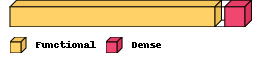

In [10]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True)

In [11]:
model.fit(train_generator)    #이진분류에서는 loss가 0점대 나와야한다

782/782 [==============================] - 174s 223ms/step - loss: 0.1278 - acc: 0.9500


In [12]:
test = pd.read_csv('/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv')
test['path'] = 'test/' + test['id'].astype(str) + '.jpg'
test

,id,label,path
0,1,0.5,test/1.jpg
1,2,0.5,test/2.jpg
2,3,0.5,test/3.jpg
3,4,0.5,test/4.jpg
4,5,0.5,test/5.jpg
...,...,...,...
12495,12496,0.5,test/12496.jpg
12496,12497,0.5,test/12497.jpg
12497,12498,0.5,test/12498.jpg
12498,12499,0.5,test/12499.jpg


In [13]:
test_generator = idg.flow_from_dataframe(test,x_col='path',y_col=None,class_mode=None,shuffle=False) # tf 에서는 shuffle=True가 default
result = model.predict(test_generator,verbose=1,workers=2)
result

Found 12500 validated image filenames.
391/391 [==============================] - 44s 111ms/step


array([[3.3082762e-01, 6.6917235e-01],
       [1.3550105e-02, 9.8644990e-01],
       [8.0429846e-03, 9.9195695e-01],
       ...,
       [6.2702782e-02, 9.3729728e-01],
       [2.3629013e-02, 9.7637105e-01],
       [9.9997342e-01, 2.6554029e-05]], dtype=float32)

In [14]:
sub = pd.read_csv('/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv')
sub['label'] = result[:,1]
sub

,id,label
0,1,6.691723e-01
1,2,9.864499e-01
2,3,9.919569e-01
3,4,9.980224e-01
4,5,7.409454e-03
...,...,...
12495,12496,4.109206e-17
12496,12497,2.735674e-01
12497,12498,9.372973e-01
12498,12499,9.763710e-01


In [15]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [16]:
sub.to_csv('sub.csv',index=False)